# Project overview
#### A cooking website is currently assessing the potential impact of transitioning its product page's media rail from a horizontal to a vertical orientation. The primary objective is to boost user engagement and drive sales
#### The website is striving to enhance the user experience and increase conversion rates, encompassing both sales and engagement metrics. The shift to a vertical media rail holds the promise of enhancing the accessibility and appeal of media content.

# Step 1: Imports
#### Import relevant libraries, packages, and modules. we will need numpy, pandas, matplotlib.pyplot, statsmodels.api, and scipy.

In [1]:
# Import relevant libraries, packages, and modules.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns

In [2]:
# Load data into a DataFrame and save in a variable.

data = pd.read_csv("C:/Users/hp/Downloads/assessment_da25.csv")

# Step2: Data Exploration

In [3]:
data.head(10)

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
0,A,5,0.0,0,2,74,0
1,A,4,0.0,4,1,21,1
2,A,4,0.0,2,0,1,2
3,A,5,0.0,0,1,26,3
4,A,5,0.0,3,3,46,4
5,A,3,0.0,1,1,31,5
6,A,5,0.0,2,1,18,6
7,A,4,0.0,2,0,22,7
8,A,6,0.0,0,2,91,8
9,A,7,0.0,2,3,2,9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Variant                2000 non-null   object 
 1   Number of page views   2000 non-null   int64  
 2   GMV (in $)             2000 non-null   float64
 3   Number of add to cart  2000 non-null   int64  
 4   Clicks on media        2000 non-null   int64  
 5   Time on Page (sec)     2000 non-null   int64  
 6   user_id                2000 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 109.5+ KB


In [5]:
data.describe()

,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,5.151000,8.489760,2.176500,1.409500,20.295000,999.500000
std,2.333864,27.861282,1.518387,1.208528,19.964676,577.494589
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3.000000,0.000000,1.000000,1.000000,6.000000,499.750000
50%,5.000000,0.000000,2.000000,1.000000,14.000000,999.500000
75%,7.000000,0.000000,3.000000,2.000000,28.000000,1499.250000
max,15.000000,152.610000,10.000000,7.000000,143.000000,1999.000000


In [6]:
# Check for missing values
data.isna().sum()

Variant                  0
Number of page views     0
GMV (in $)               0
Number of add to cart    0
Clicks on media          0
Time on Page (sec)       0
user_id                  0
dtype: int64

Text(0, 0.5, 'Number of page views')

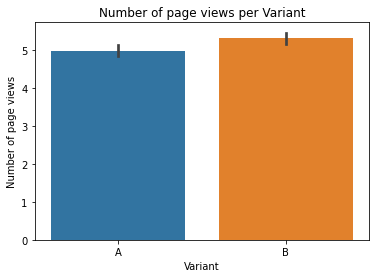

In [7]:
# #exploring means for the metrics 
sns.barplot(x=data['Variant'], y=data['Number of page views'], estimator=np.mean)
plt.title('Number of page views per Variant')
plt.xlabel('Variant')
plt.ylabel('Number of page views')


Text(0, 0.5, 'GMV (in $)')

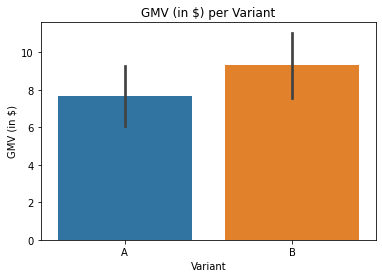

In [8]:
sns.barplot(x=data['Variant'], y=data['GMV (in $)'], estimator=np.mean)
plt.title('GMV (in $) per Variant')
plt.xlabel('Variant')
plt.ylabel('GMV (in $)')

Text(0, 0.5, 'Clicks on media')

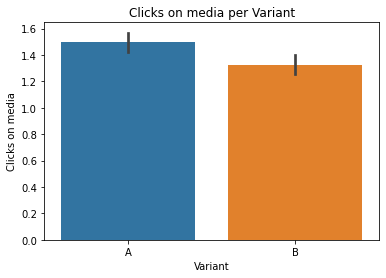

In [9]:
sns.barplot(x=data['Variant'], y=data['Clicks on media'], estimator=np.mean)
plt.title('Clicks on media per Variant')
plt.xlabel('Variant')
plt.ylabel('Clicks on media')

Text(0, 0.5, 'Time on Page (sec)')

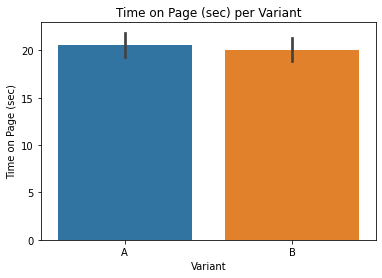

In [10]:
sns.barplot(x=data['Variant'], y=data['Time on Page (sec)'], estimator=np.mean)
plt.title('Time on Page (sec) per Variant')
plt.xlabel('Variant')
plt.ylabel('Time on Page (sec)')

Text(0, 0.5, 'Number of add to cart')

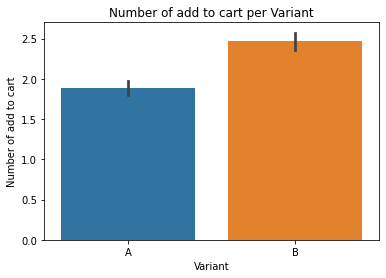

In [11]:
sns.barplot(x=data['Variant'], y=data['Number of add to cart'], estimator=np.mean)
plt.title('Number of add to cart per Variant')
plt.xlabel('Variant')
plt.ylabel('Number of add to cart')

In [12]:

data.groupby("Variant")[['Number of page views','GMV (in $)',"Clicks on media","Time on Page (sec)","Number of add to cart"]].mean()

,Number of page views,GMV (in $),Clicks on media,Time on Page (sec),Number of add to cart
Variant,,,,,
A,4.985,7.68999,1.495,20.543,1.884
B,5.317,9.28953,1.324,20.047,2.469


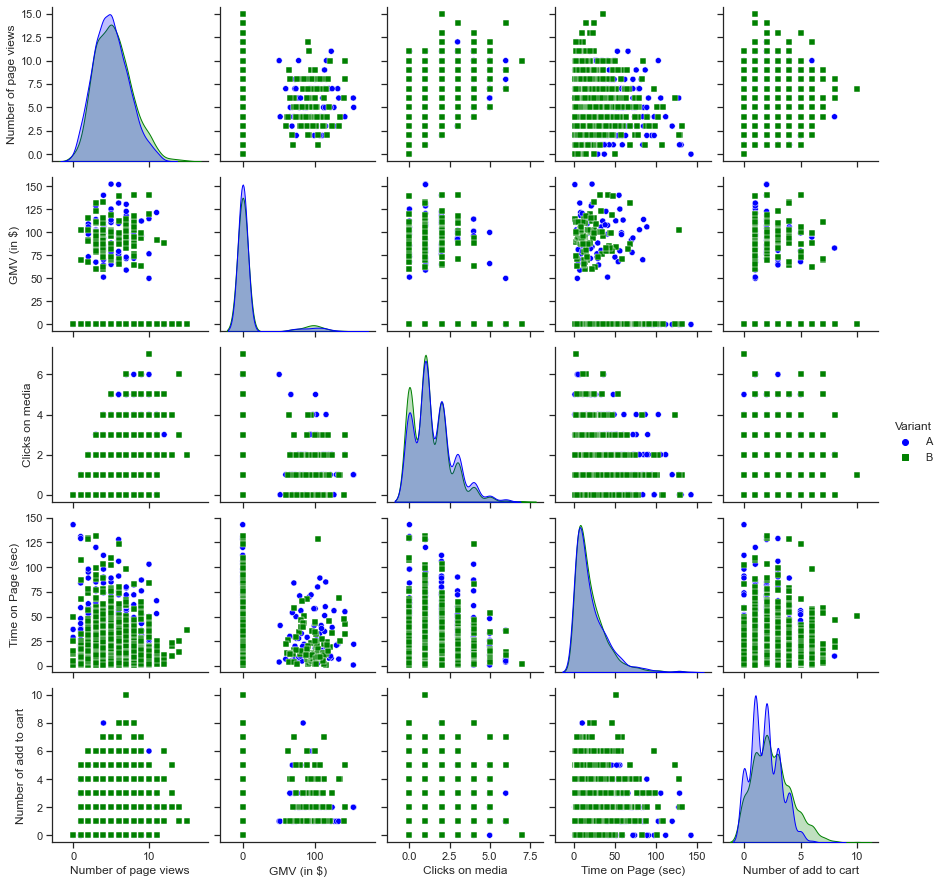

In [13]:
# explore distrebutions and relations between variables # Select relevant columns for the pairplot to explore more about data variables relationship
selected_columns = ['Number of page views', 'GMV (in $)', 'Clicks on media', 'Time on Page (sec)', 'Number of add to cart', 'Variant']

# Filter data for selected columns
pairplot_data = data[selected_columns]

# Set style
sns.set(style="ticks")

# Create pairplot
pairplot = sns.pairplot(pairplot_data, hue='Variant', markers=["o", "s"], palette={"A": "blue", "B": "green"})

# Show the plot
plt.show()


# Step3:Sampling

In [15]:
#check Randomization- Assigning %50 for both control&treatment groups
data['Variant'].value_counts(normalize=True)

A    0.5
B    0.5
Name: Variant, dtype: float64

## Considering conversion rate as a primary metric
##### let's consider the "Number of add to cart" as the conversion event.

In [16]:
# Calculation for coversion rate variant A
Add_to_cart_A = data[data["Variant"] == "A"]["Number of add to cart"]
Page_views_A = data[data["Variant"] == "A"]["Number of page views"]
CR_A=(Add_to_cart_A/Page_views_A)*100
CR_A


0        0.000000
1      100.000000
2       50.000000
3        0.000000
4       60.000000
          ...    
995     66.666667
996     11.111111
997     12.500000
998      0.000000
999     50.000000
Length: 1000, dtype: float64

In [17]:
Add_to_cart_B = data[data["Variant"] == "B"]["Number of add to cart"]
Page_views_B = data[data["Variant"] == "B"]["Number of page views"]
CR_B=(Add_to_cart_B/Page_views_B)*100
CR_B

1000     66.666667
1001    300.000000
1002     37.500000
1003      0.000000
1004    500.000000
           ...    
1995     33.333333
1996     33.333333
1997     66.666667
1998     50.000000
1999     71.428571
Length: 1000, dtype: float64

In [18]:
# Sampling variant A
sampled_data_A = CR_A.sample(n=300, replace=True, random_state=42)
sampled_data_A.head(10)

102     66.666667
435    100.000000
860     66.666667
270     66.666667
106    133.333333
71       0.000000
700    100.000000
20       9.090909
614      0.000000
121     14.285714
dtype: float64

In [19]:
sample_mean_A = sampled_data_A[:1].mean()
sample_mean_A

66.66666666666666

## Apply the central limit theorem

In [21]:
estimate_list = []
for i in range(1001):
    estimate_list.append(CR_A.sample(n=300,replace=True).mean())

In [22]:
estimate_df_A = pd.DataFrame(data={'estimate': estimate_list})
estimate_df_A.head(10)

,estimate
0,53.749014
1,47.102778
2,50.754503
3,52.642932
4,59.164700
5,48.352185
6,46.782833
7,50.096337
8,50.034133
9,54.198495


In [23]:
mean_sample_means_A = estimate_df_A['estimate'].mean()
mean_sample_means_A

50.47990406942223

<AxesSubplot:>

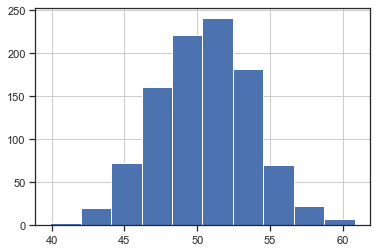

In [24]:
# Distribution sample for variant A using a histogram 
estimate_df_A['estimate'].hist()

In [49]:
# Sampling variant B
sampled_data_B = CR_B.sample(n=300, replace=True, random_state=420)
sampled_data_B.head(10)

1945     14.285714
1072    150.000000
1390     11.111111
1575     28.571429
1799     25.000000
1627     42.857143
1942     75.000000
1185     66.666667
1154     50.000000
1266    100.000000
dtype: float64

In [26]:
sample_mean_B = sampled_data_B[:1].mean()
sample_mean_B

14.285714285714285

## Apply the central limit theorem

In [28]:
# random sampling for Conversion rate for variant B
estimate_list = []
for i in range(1000):
    estimate_list.append(CR_B.sample(n=300,replace=True).mean())

In [29]:
estimate_df_B = pd.DataFrame(data={'estimate': estimate_list})
estimate_df_B.head(10)

,estimate
0,56.274094
1,58.547600
2,58.722231
3,54.964330
4,60.590414
5,57.381526
6,55.283285
7,63.864345
8,55.451472
9,56.194169


In [30]:
mean_sample_means_B = estimate_df_B['estimate'].mean()
mean_sample_means_B

58.05544728257213

<AxesSubplot:>

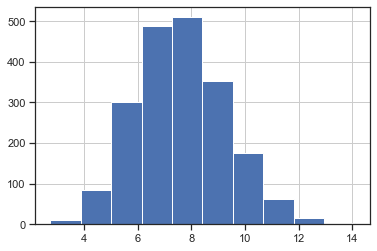

In [51]:
# Distribution sample for variant B using a histogram 
estimate_df_B['estimate'].hist()

## Concidering Gross Merchandise Value (GMV) as Secondary metrics

In [32]:
sampled_data_A = data[data["Variant"]=="A"].sample(n=300, replace=True, random_state=432)
sampled_data_A.head(10)

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
134,A,9,0.0,6,3,14,134
640,A,5,0.0,0,3,5,640
491,A,9,0.0,2,2,23,491
164,A,3,0.0,0,0,4,164
107,A,5,0.0,0,1,42,107
608,A,7,0.0,1,3,40,608
699,A,4,0.0,1,1,32,699
485,A,9,0.0,3,3,20,485
965,A,5,0.0,2,1,22,965
15,A,6,0.0,1,4,5,15


In [33]:
sample_mean_A = sampled_data_A['GMV (in $)'].mean()
sample_mean_A

7.116366666666666

## Apply the central limit theorem

In [35]:
# Do a random sampling for GMV (in $) for variant A
estimate_list = []
for i in range(1000):
    estimate_list.append(sampled_data_A['GMV (in $)'].sample(n=300,replace=True).mean())

In [36]:
estimate_df_A = pd.DataFrame(data={'estimate': estimate_list})
estimate_df_A.head()

,estimate
0,7.707667
1,5.417033
2,7.571200
3,7.195700
4,7.286333


In [37]:
mean_sample_means_A = estimate_df_A['estimate'].mean()
mean_sample_means_A

7.1177979

<AxesSubplot:>

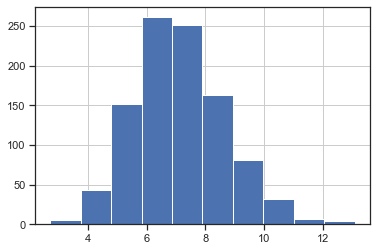

In [38]:
# Distribution using a histogram 
estimate_df_A['estimate'].hist()

In [39]:
# Sampling data for variant B
sampled_data_B = data[data["Variant"]=="B"].sample(n=300, replace=True, random_state=452)
sampled_data_B.head(10)

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
1394,B,5,0.00,3,1,7,1394
1432,B,5,0.00,4,1,79,1432
1543,B,10,140.43,2,3,42,1543
1599,B,4,0.00,1,2,19,1599
1403,B,3,91.03,3,1,13,1403
1484,B,6,0.00,1,1,21,1484
1560,B,9,0.00,4,2,4,1560
1480,B,5,0.00,3,2,4,1480
1755,B,6,0.00,1,3,14,1755
1336,B,6,94.04,2,0,23,1336


In [40]:
sample_mean_B = sampled_data_B['GMV (in $)'].mean()
sample_mean_B

8.010866666666667

In [41]:
# Do a random sampling for GMV for variant B
estimate_list_B = []
for i in range(1000):
    estimate_list.append(sampled_data_B['GMV (in $)'].sample(n=300,replace=True).mean())

In [42]:
estimate_df_B = pd.DataFrame(data={'estimate': estimate_list})
estimate_df_B.head()

,estimate
0,7.707667
1,5.417033
2,7.571200
3,7.195700
4,7.286333


In [43]:
mean_sample_means_B= estimate_df_B['estimate'].mean()
mean_sample_means_B

7.597905450000001

<AxesSubplot:>

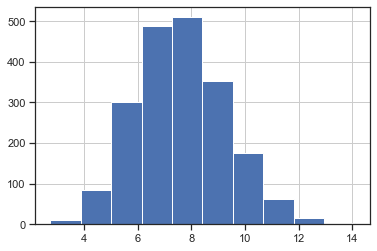

In [44]:
# Distribution using a histogram 
estimate_df_B['estimate'].hist()

# Step4: Hypotheses & Statistical Test

### Null Hypothesis :The change from a horizontal to a vertical media rail on the product page has no significant impact on user engagement and sales.
 ### H0 µA=µB
 ### Alternative Hypothesis : Based on the Ux expert  recommendations ,we believe that the change from a horizontal to a vertical media rail on the product page has a significant positive impact on user engagement and sales, As measured by Conversion rate & Gross Merchandise Value (GMV)
 ### H1 µB>µA

In [45]:
from scipy.stats import ttest_ind

# dropping zero values for CR_A and CR_B
t_stat, p_value = ttest_ind(CR_A.dropna(), CR_B.dropna())

# Output results
print(f'Test Statistic: {t_stat:.4f}')
print(f'P-value: {p_value:.4f}')

# Check for statistical significance (assuming a significance level of 0.05)
if p_value < 0.05:
    print('The difference in conversion rates is statistically significant.')
else:
    print('The difference in conversion rates is not statistically significant.')

Test Statistic: -3.0091
P-value: 0.0027
The difference in conversion rates is statistically significant.


In [46]:

# Separate data for each variant
variant_a_data = data[data['Variant'] == 'A']['GMV (in $)']
variant_b_data = data[data['Variant'] == 'B']['GMV (in $)']

# Perform one-tailed t-test for "Number of add to cart" with Variant B > Variant A
statistic, p_value = ttest_ind(variant_a_data, variant_b_data, alternative='less', equal_var=False)

# Display the results
print("One-Tailed T-Test Results for Number of page views:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpretation based on the p-value
alpha = 0.05
if p_value < alpha:
    print("The Number of GMV (in $) in Variant B is statistically significantly greater than Variant A.")
else:
    print("There is not enough evidence to suggest that the GMV (in $) in Variant B is greater than Variant A.")


One-Tailed T-Test Results for Number of page views:
Statistic: -1.2839539769831623
P-value: 0.09965388089258656
There is not enough evidence to suggest that the GMV (in $) in Variant B is greater than Variant A.


# Step 5: Conclousion

#### Overall Conclusion:

##### The changes in the product page's media rail from horizontal to vertical had a statistically significant impact on the Conversion Rate . Users in Variant B (vertical media rail) showed a significant increase in conversion rates compared to Variant A.

##### However, there is no statistically significant difference in and Gross Merchandise Value (GMV) between Variant A and Variant B. This suggests that while the changes influenced user engagement and conversion, they did not have a significant impact on and Gross Merchandise Value (GMV).

##### The presented conclusions are based on the data available, and the duration of the test is not explicitly mentioned.
##### It is essential to consider the test duration when interpreting results. If the test was conducted over a more extended period, it could contribute to the stability and reliability of the findings.
##### Longer durations may provide a more comprehensive understanding of user behavior and revenue generation patterns.